In [ ]:
# Loading the packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential # chain the different layers together
from tensorflow.keras.layers import Dense # generate the fully-connected dense layer

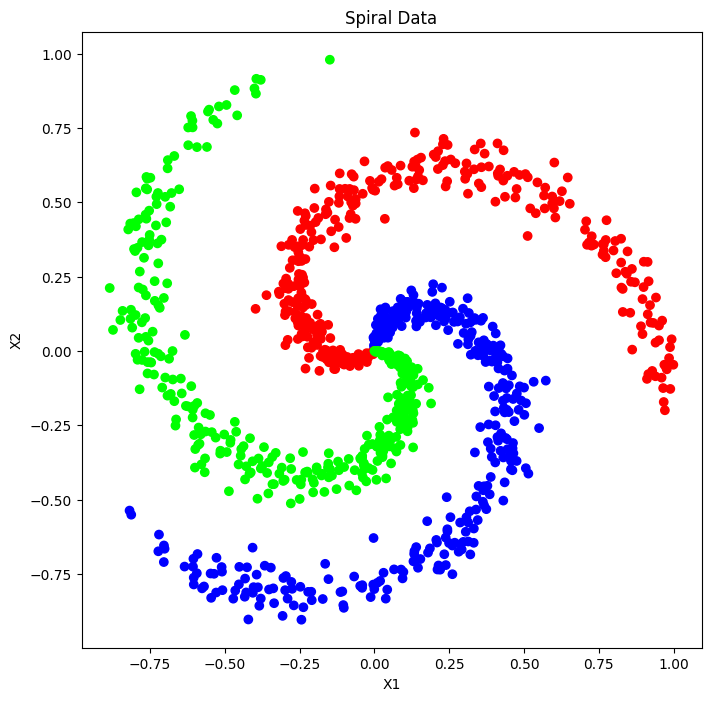

In [4]:
# Function to generate spiral data
def generate_spiral_data(n_points, n_classes):
    X = []
    y = []
    for class_number in range(n_classes):
        ix = range(n_points * class_number, n_points * (class_number +1))
        r = np.linspace(0.0, 1, n_points) # radius
        t = np.linspace(class_number*4, (class_number + 1) * 4, n_points)+ np.random.randn(n_points) * 0.2
        X.extend(np.c_[r * np.sin(t), r*np.cos(t)])
        y.extend([class_number] * n_points)
    return np.array(X), np.array(y)

# Genarate Spiral Data
X, y = generate_spiral_data(333, 3) # 999 points, 3 classes

# Plot the spiral data
plt.figure(figsize=(8,8))
plt.scatter(X[:,0], X[:, 1], c=y, cmap='brg')
plt.title('Spiral Data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()




In [5]:
X

array([[-0.00000000e+00,  0.00000000e+00],
       [ 6.68319278e-04,  2.93696845e-03],
       [-7.60225798e-04,  5.97593457e-03],
       ...,
       [-4.66783324e-01,  8.77554229e-01],
       [-3.94703399e-01,  9.15529466e-01],
       [-6.12876250e-01,  7.90178905e-01]])

In [6]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [64]:
# Split the data into training data and testing data
# If test_size - very large means more error possibility and if test_size is very small it likely be over-fitting
X_train, X_test,  y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Initialize the scalar
scalar = StandardScaler()

# Fit the scalar on the training data
scalar.fit(X_train)

# Transform the training and test data
scalar.fit(X_train)

# Transform the training and test data
X_train_scaled = scalar.transform(X_train)
X_test_scaled = scalar.transform(X_test)

# Define the model
model = Sequential()
model.add(Dense(64, input_dim=2, activation='relu')) # neurons = 64, input=2
model.add(Dense(32, activation='relu'))  # neurons = 32, input= 64
model.add(Dense(3, activation='softmax')) # neurons = 3


/Users/abroadhub/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [65]:
X_train_scaled

array([[-4.06847743e-01,  2.74729625e-01],
       [ 7.60016834e-02,  9.88286373e-02],
       [-7.15423169e-02, -8.68877559e-01],
       [-1.80701111e+00,  1.26164239e+00],
       [ 2.25868104e-01, -3.67266706e-01],
       [-3.44455150e-01,  6.04415144e-02],
       [-1.90896429e+00,  1.22353101e+00],
       [ 1.84148702e+00,  9.82417051e-01],
       [ 5.75197527e-02, -1.89426002e+00],
       [ 8.91026075e-01,  1.82842510e+00],
       [ 1.69658261e-03,  9.89343617e-02],
       [ 1.83292681e+00,  1.04046398e+00],
       [ 4.25251747e-03,  2.26404457e-01],
       [-1.34711325e+00, -1.94248807e+00],
       [ 3.19803310e-01, -5.16643025e-01],
       [ 5.05333595e-01, -1.53708251e+00],
       [ 1.01815248e+00, -7.60720439e-01],
       [-9.33050978e-01,  2.35101048e+00],
       [ 1.03074124e-01,  2.50069119e-01],
       [-1.44283835e-01,  5.14499730e-02],
       [ 2.39607244e+00, -1.08396394e-02],
       [-1.10192383e+00,  2.38220793e+00],
       [-2.92689609e-02,  7.86127460e-02],
       [-6.

In [66]:
# Complete the model 
# model.compile(optimizer=tf.keras.optimizers.SGD(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [67]:
# Fit the model
history = model.fit(x=X_train_scaled, y=y_train,
                    validation_data=(X_test_scaled, y_test),
                    epochs=40, verbose=1)

Epoch 1/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3579 - loss: 1.0735 - val_accuracy: 0.5480 - val_loss: 0.9774
Epoch 2/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5288 - loss: 0.9598 - val_accuracy: 0.5600 - val_loss: 0.8772
Epoch 3/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5479 - loss: 0.8624 - val_accuracy: 0.5500 - val_loss: 0.7957
Epoch 4/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5139 - loss: 0.8035 - val_accuracy: 0.5560 - val_loss: 0.7415
Epoch 5/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5418 - loss: 0.7401 - val_accuracy: 0.5520 - val_loss: 0.7095
Epoch 6/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5264 - loss: 0.7247 - val_accuracy: 0.5540 - val_loss: 0.6814
Epoch 7/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5390 - loss: 0.6951 - val_accuracy: 0.5800 - val_loss: 0.6512
Epoch 8/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5593 - loss: 0.6653 - val_accuracy: 0.5980 - val_loss:

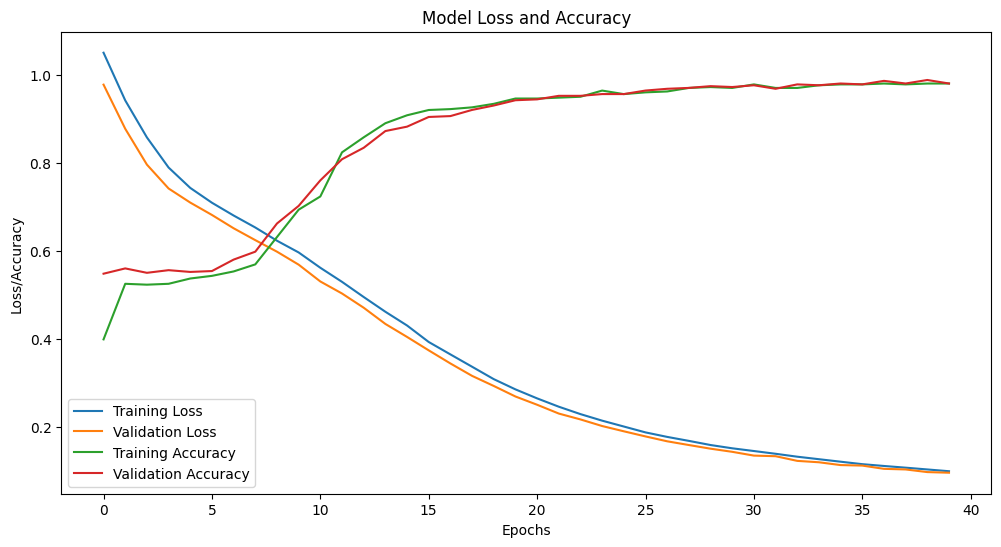

In [68]:
# Plot the training histroy
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Loss and Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.show()

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/var/folders/ml/rn5x0xnn4k9851xtlhf7f65m0000gn/T/ipykernel_6764/3002598139.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


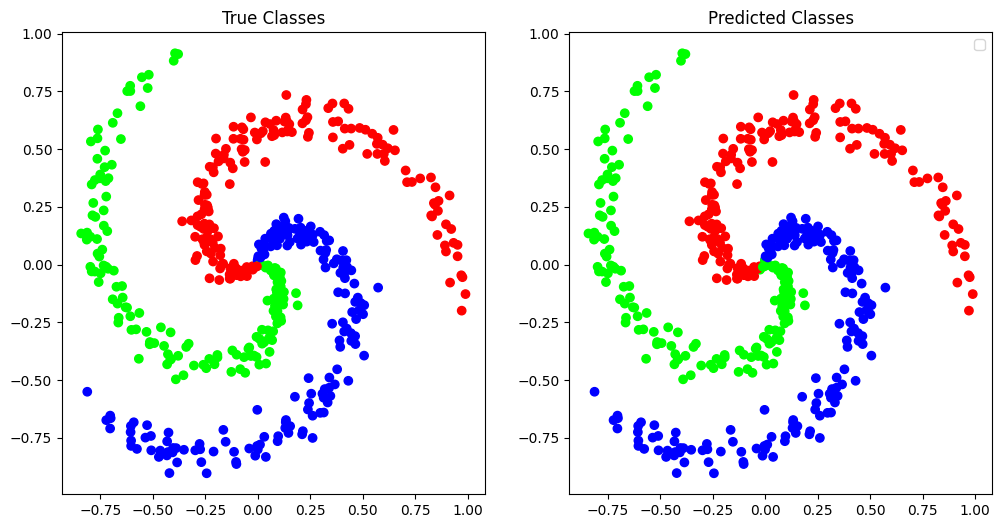

In [69]:
# Predict the class for test data
y_pred = np.argmax(model.predict(X_test_scaled), axis=1)

# Plot the comparsion of predictions
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='brg')
plt.title('True Classes')
plt.subplot(1,2,2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='brg')
plt.title('Predicted Classes')
plt.legend()
plt.show()

In [ ]:
# New Test Point
new_point = np.array([[0.1, -0.5]])
new_point_scaled = scalar.transform(new_point)
new_pred = np.argmax(model.predict(new_point_scaled), axis=1)


# Color map for legend
color_map = {0: 'red', 1:'green', 2:'blue'}

# Plot the new test point prediction
plt.figure(figsize=(8,8))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='brg', alpha=0.5)
plt.scatter(new_point[:, 0], new_point[:, 1], c='yellow', edgecolors='black', s=100, label=f"New Point Prediction:{col}")
plt.title("Spiral Data with New Test Point")
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()
